In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data Extraction and Basic Statistics

In [415]:
df = pd.read_csv('Applicant-details.csv')

In [416]:
df.sample(5)

,Applicant_ID,Annual_Income,Applicant_Age,Work_Experience,Marital_Status,House_Ownership,Vehicle_Ownership(car),Occupation,Residence_City,Residence_State,Years_in_Current_Employment,Years_in_Current_Residence,Loan_Default_Risk
69017,94023,2421544,46,17,single,rented,no,Artist,Morena,Madhya_Pradesh,6,13,0
26507,292,7110369,35,7,single,rented,yes,Computer_hardware_engineer,Mangalore,Karnataka,3,11,0
30696,19916,7452181,44,20,single,rented,yes,Dentist,Mangalore,Karnataka,13,14,0
81329,51731,9241052,69,2,single,rented,yes,Dentist,Thanjavur,Tamil_Nadu,2,13,1
33669,55839,7853718,24,8,single,rented,no,Librarian,Bahraich,Uttar_Pradesh,7,11,0


In [417]:
rows, cols = df.shape
print(f'Shape: {rows} Rows, {cols} Cols')

Shape: 100000 Rows, 13 Cols


In [418]:
list(df.columns)

['Applicant_ID',
 'Annual_Income',
 'Applicant_Age',
 'Work_Experience',
 'Marital_Status',
 'House_Ownership',
 'Vehicle_Ownership(car)',
 'Occupation',
 'Residence_City',
 'Residence_State',
 'Years_in_Current_Employment',
 'Years_in_Current_Residence',
 'Loan_Default_Risk']

In [419]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Applicant_ID                 100000 non-null  int64 
 1   Annual_Income                100000 non-null  int64 
 2   Applicant_Age                100000 non-null  int64 
 3   Work_Experience              100000 non-null  int64 
 4   Marital_Status               100000 non-null  object
 5   House_Ownership              100000 non-null  object
 6   Vehicle_Ownership(car)       100000 non-null  object
 7   Occupation                   100000 non-null  object
 8   Residence_City               100000 non-null  object
 9   Residence_State              100000 non-null  object
 10  Years_in_Current_Employment  100000 non-null  int64 
 11  Years_in_Current_Residence   100000 non-null  int64 
 12  Loan_Default_Risk            100000 non-null  int64 
dtypes: int64(7), ob

In [420]:
df.describe()

,Applicant_ID,Annual_Income,Applicant_Age,Work_Experience,Years_in_Current_Employment,Years_in_Current_Residence,Loan_Default_Risk
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,5.001617e+06,49.995400,10.110750,6.342990,11.996020,0.129970
std,28867.657797,2.876394e+06,17.056051,5.996007,3.644942,1.396826,0.336272
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,25000.750000,2.507092e+06,35.000000,5.000000,4.000000,11.000000,0.000000
50%,50000.500000,5.004938e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,75000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,100000.000000,9.999180e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [564]:
# Removing the underscores
df = df.applymap(lambda x: x.replace('_', ' ') if type(x) == str else x)
# Removing '[]' from the dataframe
df = df.applymap(lambda x: x[0:x.find('[')] if (type(x) == str and x.find('[') > -1) else x)

In [608]:
income_bins = [0, 500000, 1500000, 3000000, 4500000, 6000000, 8000000, float('inf')]
income_labels = ['0 - 5L', '5L - 15L', '15L - 30L', '30L - 45L', '45L - 60L', '60L - 80L', '80L+']
df['Income_Range'] = pd.cut(df['Annual_Income'], 
                            bins=income_bins, 
                            labels=income_labels, 
                            right=True)

In [609]:
df.sample(5)

,Annual_Income,Applicant_Age,Work_Experience,Marital_Status,House_Ownership,Vehicle_Ownership(car),Occupation,Residence_City,Residence_State,Years_in_Current_Employment,Years_in_Current_Residence,Loan_Default_Risk,Applicant_Age_Range,Income_Range
6923,1391994,62,16,single,rented,yes,Police officer,Gandhidham,Gujarat,6,13,0,61-70,5L - 15L
45409,5270503,28,20,single,rented,yes,Microbiologist,Bangalore,Karnataka,9,13,0,18-30,45L - 60L
85811,3337437,67,5,single,rented,no,Comedian,Ichalkaranji,Maharashtra,5,14,0,61-70,30L - 45L
58722,7910818,25,14,single,owned,no,Graphic Designer,Medininagar,Jharkhand,10,10,0,18-30,60L - 80L
8194,4126991,66,3,single,rented,no,Microbiologist,Nagaon,Assam,3,12,0,61-70,30L - 45L


In [610]:
def age_group(data):
    if data < 18:
        return "0-18"
    elif data <= 30:
        return "18-30"
    elif data <= 40:
        return "31-40"
    elif data <= 50:
        return "41-50"
    elif data <= 60:
        return "51-60"
    elif data <= 70:
        return "61-70"
    elif data <= 80:
        return "71-80"
    elif data <= 90:
        return "81-90"
    else:
        return "91+"

In [611]:
df['Applicant_Age_Range'] = df['Applicant_Age'].map(age_group)

In [612]:
df.sample(5)

,Annual_Income,Applicant_Age,Work_Experience,Marital_Status,House_Ownership,Vehicle_Ownership(car),Occupation,Residence_City,Residence_State,Years_in_Current_Employment,Years_in_Current_Residence,Loan_Default_Risk,Applicant_Age_Range,Income_Range
25408,2207248,49,19,single,rented,yes,Design Engineer,Raipur,Chhattisgarh,3,12,0,41-50,15L - 30L
69549,2157311,78,14,single,rented,no,Chef,Sonipat,Haryana,6,12,1,71-80,15L - 30L
47512,6256451,41,2,single,rented,yes,Software Developer,Bhubaneswar,Odisha,2,12,0,41-50,60L - 80L
94928,3246861,79,2,single,rented,yes,Aviator,Adoni,Andhra Pradesh,2,13,0,71-80,30L - 45L
68393,1714140,27,10,single,rented,yes,Politician,Howrah,West Bengal,10,10,0,18-30,15L - 30L


[]

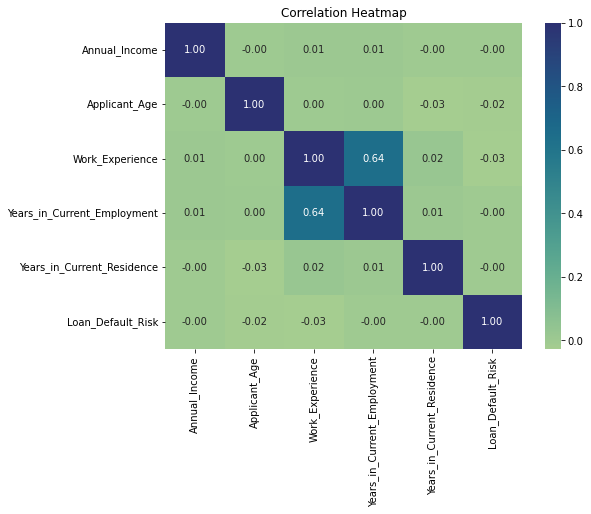

In [613]:
plt.figure(figsize=(8, 6))
plt.title('Correlation Heatmap')
sns.heatmap(df.corr(), annot=True, fmt="0.2f", cmap='crest')
plt.plot()

In [646]:
df[(df['Residence_State'] == 'Gujarat') & (df['Loan_Default_Risk'] == 1)]['Residence_City'].value_counts()

Gandhidham               79
Ahmedabad                64
Bhavnagar                61
Vadodara                 60
Junagadh                 50
Nadiad                   44
Anand                    43
Surendranagar Dudhrej    40
Morbi                    36
Jamnagar                 34
Surat                    33
Rajkot                   33
Mehsana                  12
Name: Residence_City, dtype: int64

In [615]:
# Dropping Applicant ID because its not needed
if 'Applicant_ID' in df.columns:
    df = df.drop(['Applicant_ID'], axis=1)
df.sample(5)

,Annual_Income,Applicant_Age,Work_Experience,Marital_Status,House_Ownership,Vehicle_Ownership(car),Occupation,Residence_City,Residence_State,Years_in_Current_Employment,Years_in_Current_Residence,Loan_Default_Risk,Applicant_Age_Range,Income_Range
38120,5867006,21,3,single,rented,no,Technology specialist,Miryalaguda,Telangana,3,11,0,18-30,45L - 60L
15405,3142984,22,13,single,rented,no,Chef,Haridwar,Uttarakhand,10,12,1,18-30,30L - 45L
56801,8378891,40,10,single,rented,no,Chemical engineer,Pali,Rajasthan,9,12,0,31-40,80L+
98233,7505547,48,5,single,rented,no,Financial Analyst,New Delhi,Delhi,5,10,0,41-50,60L - 80L
71090,8019114,73,17,single,rented,no,Artist,Srinagar,Jammu and Kashmir,9,14,0,71-80,80L+


In [616]:
risk = df['Loan_Default_Risk'].value_counts().reset_index()
risk.columns = ['Loan_Default_Risk', 'Count']
risk

,Loan_Default_Risk,Count
0,0,87003
1,1,12997


## Geographical Analysis

In [617]:
# Cities and total loan default risks
cities = df[df['Loan_Default_Risk'] == 1].groupby(by=['Residence_State', 'Residence_City'])['Loan_Default_Risk'].count().reset_index().sort_values(by='Loan_Default_Risk', ascending = False)
cities.head()

,Residence_State,Residence_City,Loan_Default_Risk
128,Kerala,Kochi,119
147,Madhya Pradesh,Satna,111
45,Bihar,Buxar,109
140,Madhya Pradesh,Indore,106
102,Jammu and Kashmir,Srinagar,105


### Comparison of States and Total Loan applications

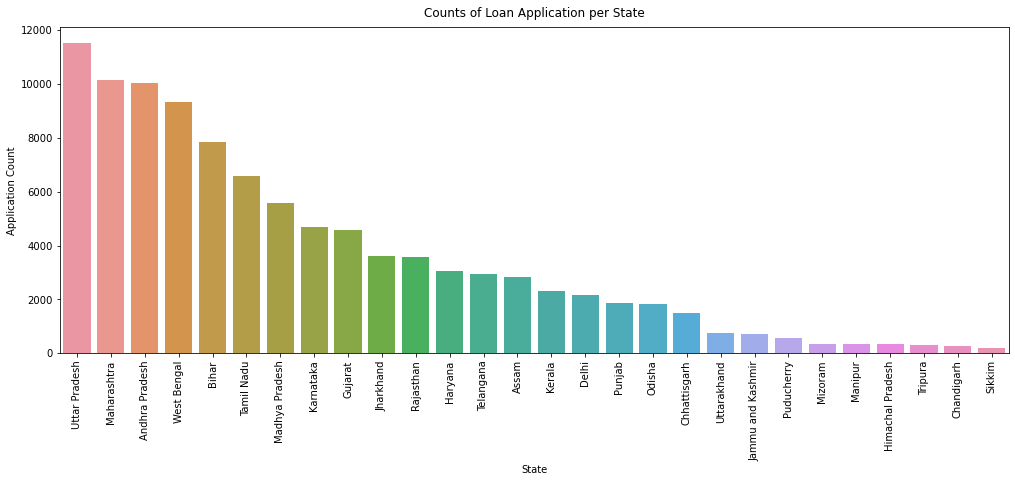

In [664]:
plt.figure(figsize=(17, 6))
sns.countplot(x='Residence_State', data=df, order=df['Residence_State'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Counts of Loan Application per State', pad=10)
plt.xlabel('State')
plt.ylabel('Application Count')
plt.show()

### Cities with most number of loan rejections

[]

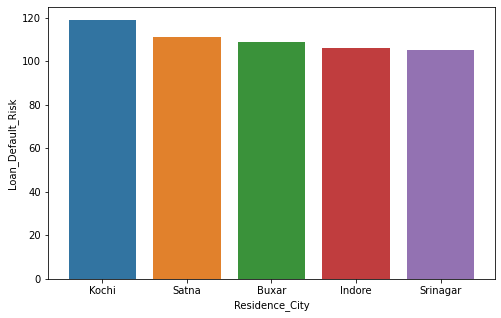

In [667]:
plt.figure(figsize=(8, 5))
sns.barplot(x = 'Residence_City', y = 'Loan_Default_Risk', data=cities.iloc[0:5, :])
plt.plot()

### Cities with least number of loan rejections

[]

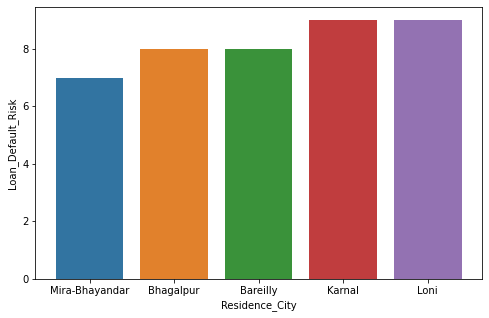

In [668]:
plt.figure(figsize=(8, 5))
sns.barplot(x = 'Residence_City', y = 'Loan_Default_Risk', data=cities.iloc[-1:-6:-1, :])
plt.plot()

In [620]:
# States and total loan default risks
states = df[df['Loan_Default_Risk'] == 1].groupby(by=['Residence_State'])['Loan_Default_Risk'].count().reset_index().sort_values(by='Loan_Default_Risk', ascending = False)
states.tail()

,Residence_State,Loan_Default_Risk
18,Puducherry,59
25,Uttarakhand,49
8,Himachal Pradesh,47
16,Mizoram,45
3,Chandigarh,21


### States with most number of loan rejections

[]

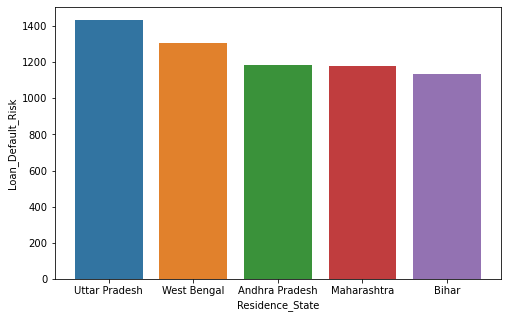

In [669]:
plt.figure(figsize=(8, 5))
sns.barplot(x = 'Residence_State', y = 'Loan_Default_Risk', data=states.iloc[0:5, :])
plt.plot()

### States with least number of loan rejections

[]

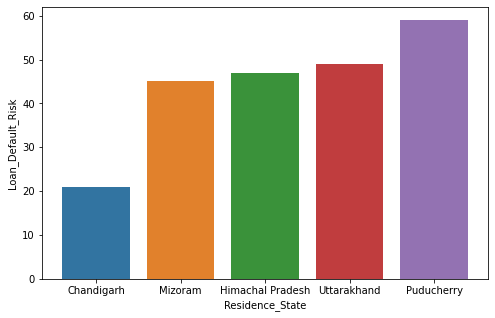

In [670]:
plt.figure(figsize=(8, 5))
sns.barplot(x = 'Residence_State', y = 'Loan_Default_Risk', data=states.iloc[-1:-6:-1, :])
plt.plot()

## Age and Loan Risk

In [623]:
def my_fmt(x):
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100)

In [624]:
# Rejected Loan Count
rejected = df[df['Loan_Default_Risk'] == 1].groupby(by=['Applicant_Age_Range'])['Applicant_Age_Range'].count().reset_index(name = 'Count').sort_values(by='Applicant_Age_Range', ascending = True)
rejected

,Applicant_Age_Range,Count
0,18-30,2596
1,31-40,2038
2,41-50,2248
3,51-60,2161
4,61-70,2109
5,71-80,1845


### Count between Rejected Loans and Age

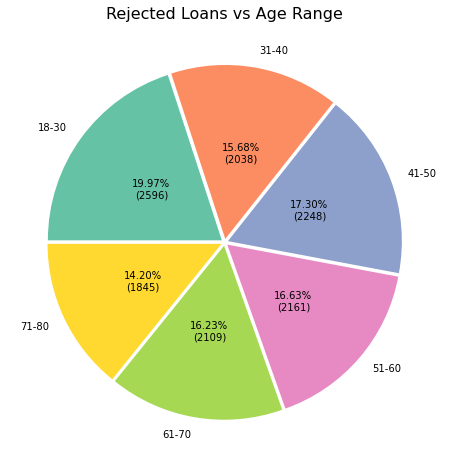

In [625]:
total = rejected['Count'].sum()
plt.figure(figsize=(14, 8))
plt.title('Rejected Loans vs Age Range', fontdict={"fontsize":16})
plt.pie(x=rejected['Count'], 
        labels=rejected['Applicant_Age_Range'], 
        autopct=my_fmt, 
        colors=sns.color_palette('Set2'), 
        pctdistance=0.5, 
        labeldistance=1.1,
        explode=[0.02, 0.02, 0.02, 0.02, 0.02, 0.02],
        counterclock=False,
        startangle=180
       )
plt.show()

In [626]:
# Approved Loan Count
approved = df[df['Loan_Default_Risk'] == 0].groupby(by=['Applicant_Age_Range'])['Applicant_Age_Range'].count().reset_index(name = 'Count').sort_values(by='Applicant_Age_Range', ascending = True)
approved

,Applicant_Age_Range,Count
0,18-30,14669
1,31-40,14368
2,41-50,15062
3,51-60,14715
4,61-70,15200
5,71-80,12989


### Count between Rejected Loans and Age

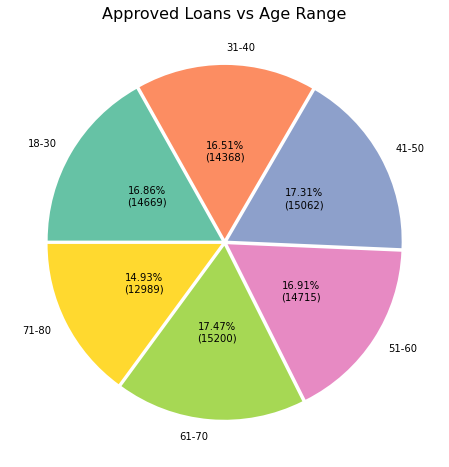

In [627]:
plt.figure(figsize=(14, 8))
plt.title('Approved Loans vs Age Range', fontdict={"fontsize":16})
total = approved['Count'].sum()
plt.pie(approved['Count'],
        autopct=my_fmt,
        labels=approved['Applicant_Age_Range'],
        colors=sns.color_palette('Set2'),
        explode=[0.02, 0.02, 0.02, 0.02, 0.02, 0.02],
        pctdistance=0.5, 
        labeldistance=1.1,
        counterclock=False,
        startangle=180
       )
plt.show()

## Income Analysis

In [628]:
df[df['Loan_Default_Risk'] == 1].groupby(['Income_Range'])['Annual_Income'].count()

Income_Range
0 - 5L        757
5L - 15L     1249
15L - 30L    1911
30L - 45L    1995
45L - 60L    1923
60L - 80L    2533
80L+         2629
Name: Annual_Income, dtype: int64

In [629]:
len(df[df['Annual_Income'] > 8000000])

19540

### Total Loans and the Income Range

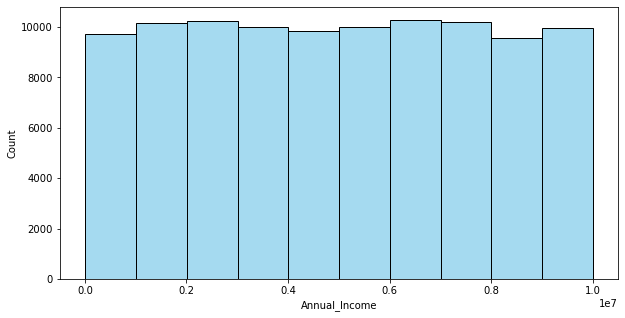

In [680]:
plt.figure(figsize=(10, 5))
sns.histplot(x='Annual_Income', data=df, bins=10, color="skyblue")
plt.show()

### Income range of individuals at Risk Loan

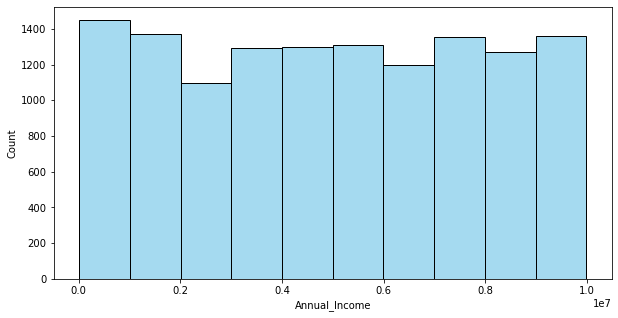

In [679]:
plt.figure(figsize=(10, 5))
sns.histplot(x='Annual_Income', data=df[df['Loan_Default_Risk'] == 1], bins=10, color="skyblue")
plt.show()

In [681]:
df.columns

Index(['Annual_Income', 'Applicant_Age', 'Work_Experience', 'Marital_Status',
       'House_Ownership', 'Vehicle_Ownership(car)', 'Occupation',
       'Residence_City', 'Residence_State', 'Years_in_Current_Employment',
       'Years_in_Current_Residence', 'Loan_Default_Risk',
       'Applicant_Age_Range', 'Income_Range'],
      dtype='object')

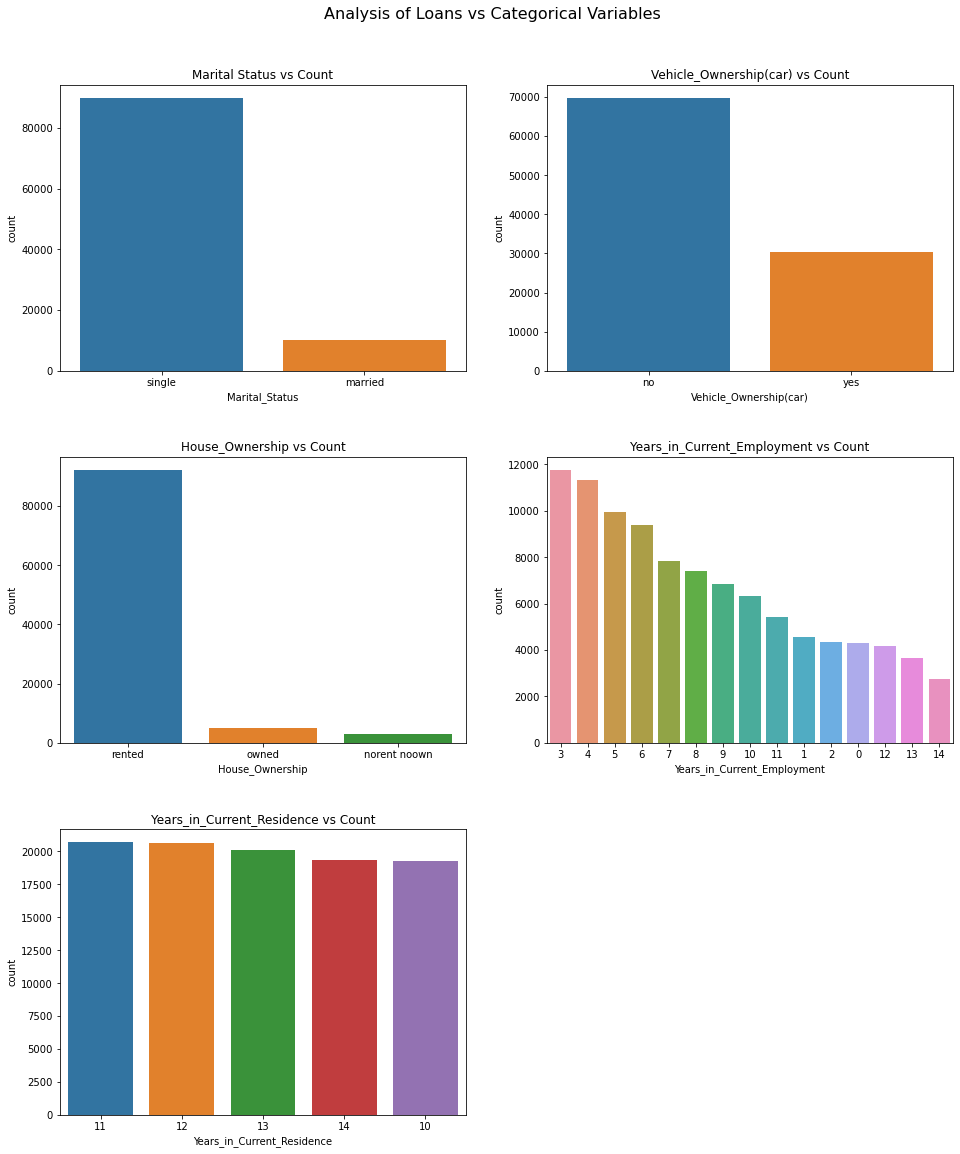

In [729]:
plt.figure(figsize=(16, 18))
plt.subplots_adjust(top=0.92)
plt.suptitle('Analysis of Loans vs Categorical Variables', fontsize=16)

plt.subplots_adjust(hspace=0.3, wspace=0.2)
plt.subplot(3, 2, 1)
plt.title('Marital Status vs Count')
sns.countplot(x = df['Marital_Status'])

plt.subplot(3, 2, 2)
plt.title('Vehicle_Ownership(car) vs Count')
sns.countplot(x = df['Vehicle_Ownership(car)'])

plt.subplot(3, 2, 3)
plt.title('House_Ownership vs Count')
sns.countplot(x = df['House_Ownership'])

plt.subplot(3, 2, 4)
plt.title('Years_in_Current_Employment vs Count')
sns.countplot(x = df['Years_in_Current_Employment'], order=df['Years_in_Current_Employment'].value_counts().index)

plt.subplot(3, 2, 5)
plt.title('Years_in_Current_Residence vs Count')
sns.countplot(x = df['Years_in_Current_Residence'], order=df['Years_in_Current_Residence'].value_counts().index)

plt.show()

## Data Preprocessing

In [600]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

In [602]:
X = df.drop(columns=['Loan_Default_Risk'])
X.sample(5)

,Annual_Income,Applicant_Age,Work_Experience,Marital_Status,House_Ownership,Vehicle_Ownership(car),Occupation,Residence_City,Residence_State,Years_in_Current_Employment,Years_in_Current_Residence,Applicant_Age_Range,Income_Range
61432,1591909,71,17,married,rented,no,Civil engineer,Ballia,Uttar Pradesh,4,12,71-80,15L - 30L
20096,7992060,44,15,single,rented,no,Fashion Designer,Nagaon,Assam,4,11,41-50,60L - 80L
56073,2145278,47,9,single,rented,yes,Firefighter,Anantapuram,Andhra Pradesh,8,10,41-50,15L - 30L
16767,2421029,48,13,single,rented,no,Surveyor,Visakhapatnam,Andhra Pradesh,5,10,41-50,15L - 30L
7436,532746,78,18,married,rented,yes,Petroleum Engineer,Haridwar,Uttarakhand,10,12,71-80,5L - 15L


In [437]:
y = df.iloc[:, -1]
y

0        71-80
1        31-40
2        61-70
3        41-50
4        41-50
         ...  
99995    61-70
99996    61-70
99997    61-70
99998    51-60
99999    51-60
Name: Applicant_Age_Range, Length: 100000, dtype: object

In [569]:
df[df['Marital_Status']=='married'].count()

Annual_Income                  10237
Applicant_Age                  10237
Work_Experience                10237
Marital_Status                 10237
House_Ownership                10237
Vehicle_Ownership(car)         10237
Occupation                     10237
Residence_City                 10237
Residence_State                10237
Years_in_Current_Employment    10237
Years_in_Current_Residence     10237
Loan_Default_Risk              10237
Applicant_Age_Range            10237
dtype: int64

In [440]:
df['House_Ownership'].unique()

array(['rented', 'owned', 'norent_noown'], dtype=object)

In [441]:
df['Vehicle_Ownership(car)'].unique()

array(['no', 'yes'], dtype=object)

In [442]:
df['Occupation'].unique()

array(['Psychologist', 'Petroleum_Engineer', 'Drafter',
       'Chartered_Accountant', 'Air_traffic_controller',
       'Biomedical_Engineer', 'Fashion_Designer', 'Magistrate',
       'Technology_specialist', 'Lawyer', 'Civil_servant', 'Physician',
       'Financial_Analyst', 'Design_Engineer', 'Hotel_Manager',
       'Engineer', 'Computer_hardware_engineer', 'Flight_attendant',
       'Comedian', 'Scientist', 'Mechanical_engineer', 'Geologist',
       'Aviator', 'Web_designer', 'Designer', 'Architect', 'Statistician',
       'Graphic_Designer', 'Dentist', 'Consultant', 'Secretary',
       'Economist', 'Official', 'Chemical_engineer', 'Politician',
       'Army_officer', 'Microbiologist', 'Librarian',
       'Software_Developer', 'Civil_engineer', 'Technical_writer', 'Chef',
       'Artist', 'Firefighter', 'Computer_operator', 'Surgeon',
       'Industrial_Engineer', 'Police_officer', 'Analyst', 'Technician',
       'Surveyor'], dtype=object)

In [565]:
df['Residence_City'].unique()

array(['Jalandhar', 'Bally', 'Indore', 'Kurnool', 'Asansol', 'Bongaigaon',
       'Katihar', 'Sikar', 'Chinsurah', 'Muzaffarnagar', 'Darbhanga',
       'Chandigarh city', 'Adoni', 'Ludhiana', 'Amroha', 'Aligarh',
       'Udupi', 'Delhi city', 'Moradabad', 'Sonipat', 'Gandhinagar',
       'Raebareli', 'Madhyamgram', 'Nashik', 'Bilaspur', 'Davanagere',
       'Kakinada', 'Chandrapur', 'Sangli-Miraj & Kupwad', 'Dhule',
       'Bhind', 'Kollam', 'Durg', 'Ajmer', 'Malegaon', 'Kottayam',
       'Bhalswa Jahangir Pur', 'Gaya', 'Guna', 'Hapur', 'Agartala',
       'Thiruvananthapuram', 'Kharagpur', 'Rewa', 'Jorhat', 'Ambattur',
       'Sambhal', 'Etawah', 'Bellary', 'New Delhi', 'South Dumdum',
       'Gangtok', 'Aizawl', 'Pimpri-Chinchwad', 'Nangloi Jat',
       'Anantapuram', 'Mangalore', 'Hazaribagh', 'Kumbakonam', 'Jhansi',
       'Proddatur', 'Avadi', 'Bhagalpur', 'Madanapalle', 'Meerut',
       'Tiruppur', 'Jehanabad', 'Machilipatnam', 'Howrah', 'Jamshedpur',
       'Kolkata', 'Phagwara',

In [444]:
df['Residence_State'].unique()

array(['Punjab', 'West_Bengal', 'Madhya_Pradesh', 'Andhra_Pradesh',
       'Assam', 'Bihar', 'Rajasthan', 'Uttar_Pradesh', 'Chandigarh',
       'Karnataka', 'Delhi', 'Haryana', 'Gujarat', 'Maharashtra',
       'Chhattisgarh', 'Kerala', 'Tripura', 'Tamil_Nadu', 'Sikkim',
       'Mizoram', 'Jharkhand', 'Uttar_Pradesh[5]', 'Odisha', 'Telangana',
       'Jammu_and_Kashmir', 'Himachal_Pradesh', 'Uttarakhand',
       'Puducherry', 'Manipur'], dtype=object)

In [445]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [446]:
len(X_train[X_train['Marital_Status'] == 'single'])

71776

In [447]:
columns_to_scale = ['Annual_Income', 'Applicant_Age', 'Work_Experience', 'Years_in_Current_Employment', 'Years_in_Current_Residence']
scaler = StandardScaler()

X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])

# Transform the selected columns in the test set using the same scaler
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [448]:
X_train

,Annual_Income,Applicant_Age,Work_Experience,Marital_Status,House_Ownership,Vehicle_Ownership(car),Occupation,Residence_City,Residence_State,Years_in_Current_Employment,Years_in_Current_Residence,Loan_Default_Risk
75220,0.454879,-1.700800,0.480909,single,rented,no,Official,Davanagere,Karnataka,0.179884,-0.714511,0
48955,1.133471,-0.997514,0.814438,single,rented,yes,Magistrate,Kakinada,Andhra_Pradesh,0.179884,0.717482,0
44966,0.432211,-0.704478,-0.352913,single,rented,yes,Air_traffic_controller,Thane,Maharashtra,0.454376,0.717482,0
13568,-0.981994,-1.349157,0.981202,single,rented,no,Comedian,Muzaffarpur,Bihar,1.826832,0.001486,0
92727,-0.085275,-1.407764,0.981202,single,rented,yes,Army_officer,Rohtak,Haryana,1.003358,0.001486,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6265,-0.240353,1.463987,-0.686442,single,rented,no,Surgeon,Sambhal,Uttar_Pradesh,-0.094607,0.001486,0
54886,-0.513210,-1.642192,-0.519678,single,rented,no,Statistician,Fatehpur,Uttar_Pradesh,0.179884,1.433478,0
76820,1.060806,0.643487,-1.353500,single,rented,no,Graphic_Designer,Phagwara,Punjab,-1.192572,1.433478,0
860,-1.316309,0.819308,-0.352913,single,rented,yes,Petroleum_Engineer,Durg,Chhattisgarh,-0.369098,0.001486,0


In [449]:
label_encoder = LabelEncoder()
label_cols = list(set(X.columns).difference(columns_to_scale))
label_cols = list(set(label_cols).difference(categorical_columns))
label_cols

# X_train[columns_to_scale] = label_encoder.fit_transform(X_train[label_cols])

# # Transform the selected columns in the test set using the same scaler
# X_test[columns_to_scale] = label_encoder.transform(X_test[label_cols])

['Loan_Default_Risk',
 'Residence_City',
 'Residence_State',
 'House_Ownership',
 'Occupation']

In [450]:
categorical_columns = ['Vehicle_Ownership(car)', 'Marital_Status']
for column in categorical_columns:
    le = LabelEncoder()
    X_train[column] = le.fit_transform(X_train[column])
    X_test[column] = le.transform(X_test[column])

/var/folders/q3/yhp4sfcx5z59nt8svjxnkl9r0000gn/T/ipykernel_22014/3556605258.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[column] = le.fit_transform(X_train[column])
/var/folders/q3/yhp4sfcx5z59nt8svjxnkl9r0000gn/T/ipykernel_22014/3556605258.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[column] = le.transform(X_test[column])


In [451]:
X_train['Vehicle_Ownership(car)'].sum()

24235

In [452]:
X_train['Marital_Status'].sum()

71776

In [453]:
# Create a ColumnTransformer for encoding categorical columns
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[ # LabelEncoder for ordinal categorical columns
        ('one_hot_encoder', OneHotEncoder(drop='first', sparse=False), label_cols)  # OneHotEncoder for nominal categorical columns
    ],
    remainder='passthrough'  # Pass through any numerical columns without transformation
)

# Fit and transform the preprocessing on the training set
X_train_encoded = preprocessor.fit_transform(X_train)

# Transform the test set using the same preprocessing
X_test_encoded = preprocessor.transform(X_test)


## ML Prediction & Metrics 

In [454]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
def make_preds(regressor, x_test, y_test):
    y_pred = regressor.predict(x_test) 
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{classification_rep}")

# ML Algorithms

## 1. Logistic Regression

In [455]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression(max_iter=10000)
regressor.fit(X_train_encoded, y_train)

LogisticRegression(max_iter=10000)

In [456]:
make_preds(regressor, X_test_encoded, y_test)

Accuracy: 0.9992
Confusion Matrix:
[[3456    0    0    0    0    0]
 [   0 3355    4    0    0    0]
 [   0    0 3429    0    0    0]
 [   0    0    0 3343   12    0]
 [   0    0    0    0 3508    0]
 [   0    0    0    0    0 2893]]
Classification Report:
              precision    recall  f1-score   support

       18-30       1.00      1.00      1.00      3456
       31-40       1.00      1.00      1.00      3359
       41-50       1.00      1.00      1.00      3429
       51-60       1.00      1.00      1.00      3355
       61-70       1.00      1.00      1.00      3508
       71-80       1.00      1.00      1.00      2893

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



## 2. Decision Tree

In [457]:
from sklearn.tree import DecisionTreeClassifier
regressor = DecisionTreeClassifier()

In [458]:
regressor.fit(X_train_encoded, y_train)

DecisionTreeClassifier()

In [459]:
make_preds(regressor, X_test_encoded, y_test)

Accuracy: 1.0
Confusion Matrix:
[[3456    0    0    0    0    0]
 [   0 3359    0    0    0    0]
 [   0    0 3429    0    0    0]
 [   0    0    0 3355    0    0]
 [   0    0    0    0 3508    0]
 [   0    0    0    0    0 2893]]
Classification Report:
              precision    recall  f1-score   support

       18-30       1.00      1.00      1.00      3456
       31-40       1.00      1.00      1.00      3359
       41-50       1.00      1.00      1.00      3429
       51-60       1.00      1.00      1.00      3355
       61-70       1.00      1.00      1.00      3508
       71-80       1.00      1.00      1.00      2893

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

